In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cardio_train.csv',sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


checking for missing values

In [3]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


The age column is represented as no of days. So we will chnage it to float type and years

In [6]:
df = df.astype({"age":float})
df['age'] /= 365
df['age']= df['age'].round(2)

In [7]:
df['height'] /= 100

In [8]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.56,1,1.55,69.0,130,80,2,2,0,0,1,0
1,989,40.13,1,1.63,71.0,110,70,1,1,0,0,1,1
2,990,60.00,1,1.65,70.0,120,80,1,1,0,0,1,0
3,991,39.86,2,1.65,85.0,120,80,1,1,1,1,1,0
4,992,64.09,1,1.55,62.0,120,80,1,1,0,0,1,0


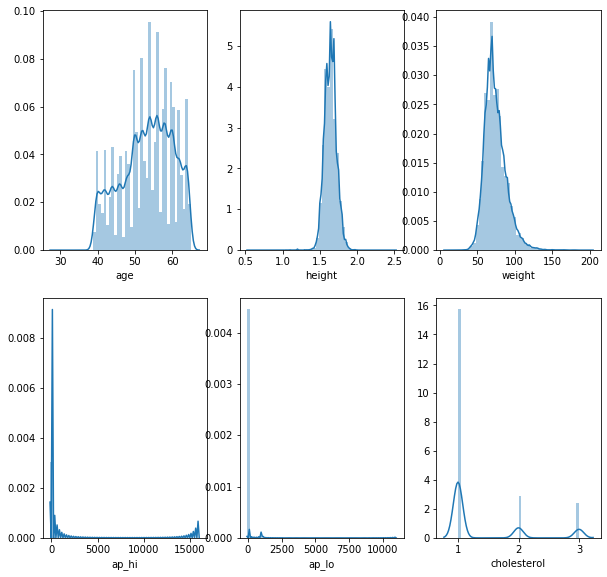

In [9]:
columns = ['age','height','weight','ap_hi','ap_lo','cholesterol']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

The plotting looks great!

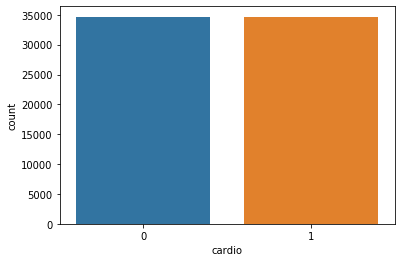

In [10]:
sns.countplot(df['cardio'])

Great! the data set looks balanced

lets drop the ID column

In [11]:
df = df.drop(columns = 'id')

In [12]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61.56,1,1.55,69.0,130,80,2,2,0,0,1,0
1,40.13,1,1.63,71.0,110,70,1,1,0,0,1,1
2,60.00,1,1.65,70.0,120,80,1,1,0,0,1,0
3,39.86,2,1.65,85.0,120,80,1,1,1,1,1,0
4,64.09,1,1.55,62.0,120,80,1,1,0,0,1,0


In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost.sklearn import XGBRFClassifier

In [14]:
y = df['cardio']
x = df.iloc[:,0:11]



In [15]:
x.shape, y.shape

((69301, 11), (69301,))

In [16]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,61.56,1,1.55,69.0,130,80,2,2,0,0,1
1,40.13,1,1.63,71.0,110,70,1,1,0,0,1
2,60.00,1,1.65,70.0,120,80,1,1,0,0,1
3,39.86,2,1.65,85.0,120,80,1,1,1,1,1
4,64.09,1,1.55,62.0,120,80,1,1,0,0,1


In [17]:
scaler = StandardScaler()
x_transform  = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

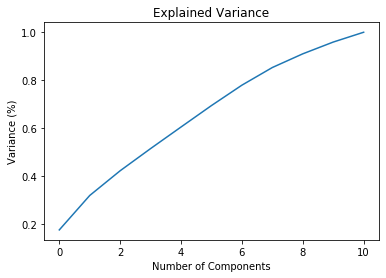

In [18]:
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [19]:
variables = x_transform

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif["Features"] = x.columns

In [20]:
vif

,VIF,Features
0,1.038232,age
1,1.458609,gender
2,1.440426,height
3,1.133127,weight
4,1.001805,ap_hi
5,1.002879,ap_lo
6,1.299161,cholesterol
7,1.261151,gluc
8,1.246555,smoke
9,1.138881,alco


We will accept all the features as vif is less than 5 which means collinearity does not exist

First we will apply Decision tree Algorithms

In [21]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6325814054158049

Let's try to improve the accuracy and checking the parameters that improves the model accuracy. We are applying grid search cv

In [22]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [23]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [24]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [25]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [26]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, min_samples_leaf= 1, min_samples_split= 2, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
clf.score(x_test,y_test)

0.7332980616612957

Accuracy has been improved. Lets now check with Random forest classifier

In [28]:
clf2 = RandomForestClassifier() 
clf2.fit(x_train,y_train)
clf2.score(x_test,y_test)


0.718002982059545

In [29]:
#dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [30]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
from sklearn.model_selection import RandomizedSearchCV
ran_grid_param = {
    'bootstrap' :[True,False],
    'criterion':['gini','entropy'],
    'max_depth' : range(2,32,1),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'n_estimators':[100,200,500]
       
}

In [31]:
rf_grid = RandomizedSearchCV(estimator = clf2,
                               param_distributions = ran_grid_param,
                               n_iter = 100, cv = 3, verbose=2, random_state=42,
                               n_jobs = -1)

In [32]:
rf_grid.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [33]:
rf_grid.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 11,
 'criterion': 'entropy',
 'bootstrap': True}

In [34]:
clf2 = RandomForestClassifier(n_estimators= 500,min_samples_split=2,min_samples_leaf= 4,max_features='auto',max_depth=10
                              ,criterion = 'gini', bootstrap= True)
clf2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
clf2.score(x_test,y_test)

0.7372420758982252

Clearly after hyperparameter tuning in random forest alogorithm accuracy improved

Let's check with logistic regression

In [36]:
clf3 = LogisticRegression(solver='lbfgs',max_iter=1000)
clf3.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# predict class labels for the test set
predicted = clf3.predict(x_test)
predicted

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[7948 2456]
 [3337 7050]]
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10404
           1       0.74      0.68      0.71     10387

    accuracy                           0.72     20791
   macro avg       0.72      0.72      0.72     20791
weighted avg       0.72      0.72      0.72     20791



In [39]:

# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(solver = 'liblinear'), x, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.71562545 0.71111111 0.72640693 0.72741703 0.71760462 0.72222222
 0.72554113 0.72712843 0.71991342 0.71630592]
0.7209276244523684


In [40]:

# Area Under Curve
from sklearn.metrics import roc_curve, roc_auc_score
auc = roc_auc_score(y_test, predicted)
auc

0.7213349895010794

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, predicted)

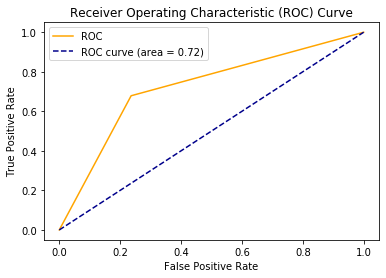

In [42]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Here accuracy is less than random forest classifier and decision tree classifier

XGBOOST

In [43]:
clf4 = xgb.XGBClassifier()

In [44]:
clf4.get_params().keys()

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])

In [45]:
from sklearn.model_selection import StratifiedKFold

grid_xgb_param = {'learning_rate' : [ 0.001, 0.01, 0.1],
                  'n_estimators' : [500,1000],
                  'max_depth' : [5,7,9],
                  'min_child_weight': [4,6]
                  }
#param_grid =
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)


In [46]:
grid_search = GridSearchCV(clf4, grid_xgb_param , scoring="neg_log_loss", n_jobs=-1, cv=kfold)

In [48]:
grid_result = grid_search.fit(x_train, y_train)

In [49]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.540866 using {'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1000}
-0.606624 (0.003389) with: {'learning_rate': 0.001, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500}
-0.570809 (0.005465) with: {'learning_rate': 0.001, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1000}
-0.606596 (0.003385) with: {'learning_rate': 0.001, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 500}
-0.570765 (0.005448) with: {'learning_rate': 0.001, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 1000}
-0.605060 (0.003530) with: {'learning_rate': 0.001, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500}
-0.568661 (0.005614) with: {'learning_rate': 0.001, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000}
-0.605030 (0.003567) with: {'learning_rate': 0.001, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators': 500}
-0.568629 (0.005645) with: {'learning_rate': 0.001, 'max_depth': 7, 'min_child_weight': 6, 'n_estimators':

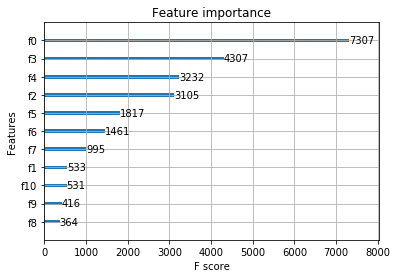

In [53]:

model = xgb.XGBClassifier(learning_rate=0.01,
                           n_estimators=1000,
                           max_depth=5,
                           min_child_weight=4
                           )
final_m=model.fit(x_train, y_train)
xgb.plot_importance(final_m)
plt.show()
predictions = model.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score

print("training set auc:",accuracy_score(y_test, predictions))
predictions = model.predict(x_test)
print("test set auc:",accuracy_score(y_test, predictions))
print(model.get_params())

XGBA = accuracy_score(y_test, predictions)
print("The Accuracy  is {}".format(XGBA))

training set auc: 0.7393583762204801
test set auc: 0.7393583762204801
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 4, 'missing': None, 'n_estimators': 1000, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
The Accuracy  is 0.7393583762204801


In [ ]:
Here accuracy is highest 